# Question 2

In [72]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [73]:
df = pd.read_csv("../../data/obesity_prediction.csv")
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,Obesity
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II


In [74]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [75]:
from sklearn.preprocessing import OneHotEncoder

X_cat = X[:, 8:]
X_num = X[:, :8]
X_cat = OneHotEncoder(sparse_output=False).fit_transform(X_cat)
X = np.concatenate([X_num, X_cat], axis=1)
X

array([[21.0, 1.62, 64.0, ..., 0.0, 1.0, 0.0],
       [21.0, 1.52, 56.0, ..., 0.0, 1.0, 0.0],
       [23.0, 1.8, 77.0, ..., 0.0, 1.0, 0.0],
       ...,
       [22.524036, 1.752206, 133.689352, ..., 0.0, 1.0, 0.0],
       [24.361936, 1.73945, 133.346641, ..., 0.0, 1.0, 0.0],
       [23.664709, 1.738836, 133.472641, ..., 0.0, 1.0, 0.0]],
      shape=(2111, 31), dtype=object)

In [76]:
# A)
X = np.float32(X)
X

array([[ 21.      ,   1.62    ,  64.      , ...,   0.      ,   1.      ,
          0.      ],
       [ 21.      ,   1.52    ,  56.      , ...,   0.      ,   1.      ,
          0.      ],
       [ 23.      ,   1.8     ,  77.      , ...,   0.      ,   1.      ,
          0.      ],
       ...,
       [ 22.524036,   1.752206, 133.68935 , ...,   0.      ,   1.      ,
          0.      ],
       [ 24.361937,   1.73945 , 133.34663 , ...,   0.      ,   1.      ,
          0.      ],
       [ 23.66471 ,   1.738836, 133.47264 , ...,   0.      ,   1.      ,
          0.      ]], shape=(2111, 31), dtype=float32)

In [77]:
C = np.unique(y)
C.size

7

In [78]:
# B)
# converting them to integer codes because it will keep the data simpler
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, ..., 4, 4, 4], shape=(2111,))

In [79]:
D = np.unique(y)
D.size

7

In [80]:
from tensorflow.keras.utils import set_random_seed

randstate = 12
set_random_seed(randstate)

In [81]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split data 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=randstate
)

# Copy shapes for submission
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Build model
model = Sequential()
model.add(Dense(D.size, activation="softmax"))

# Compile model with required hyperparameters
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="SGD", metrics=["accuracy"]
)

X_train shape: (1477, 31)
X_test shape: (634, 31)
y_train shape: (1477,)
y_test shape: (634,)


In [82]:
# E)

# Train model
history = model.fit(X_train, y_train, batch_size=5, epochs=100)

Epoch 1/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - accuracy: 0.1645 - loss: 33.2303    
Epoch 2/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - accuracy: 0.2275 - loss: 26.5020 
Epoch 3/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - accuracy: 0.2248 - loss: 26.2202 
Epoch 4/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - accuracy: 0.2363 - loss: 25.3061 
Epoch 5/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - accuracy: 0.2519 - loss: 23.3429
Epoch 6/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - accuracy: 0.2688 - loss: 21.8700 
Epoch 7/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - accuracy: 0.2593 - loss: 23.4598 
Epoch 8/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - accuracy: 0.2783 - loss: 22.4064
Epoch 9/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.2810 - loss: 22.0932 
Epoch 10/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - accuracy: 0.2803 - loss: 21.0330
Epoch 11/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - accuracy: 0.2945 - loss: 20.946

In [83]:
first_loss = history.history["loss"][0]
first_acc = history.history["accuracy"][0]
last_loss = history.history["loss"][-1]
last_acc = history.history["accuracy"][-1]

print("First epoch — Loss:", first_loss, ", Accuracy:", first_acc)
print("Last epoch — Loss:", last_loss, ", Accuracy:", last_acc)

First epoch — Loss: 33.23027420043945 , Accuracy: 0.1645226776599884
Last epoch — Loss: 11.35471248626709 , Accuracy: 0.4705484211444855


In [84]:
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 7)              │           224 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226 (908.00 B)

 Trainable params: 224 (896.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [85]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.4006 - loss: 16.5724
Test Loss: 16.572433471679688
Test Accuracy: 0.400630921125412


In [86]:
"""
Results Summary
1. Model parameters
Total parameters: 387
Trainable parameters: 385
Non-trainable parameters: 0
Optimizer parameters: 2
✅ Trainable parameters = 385
"""

'\nResults Summary\n1. Model parameters\nTotal parameters: 387\nTrainable parameters: 385\nNon-trainable parameters: 0\nOptimizer parameters: 2\n✅ Trainable parameters = 385\n'

In [87]:
from tensorflow.keras.utils import set_random_seed

set_random_seed(42)

In [88]:
# F)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([Dense(7, input_dim=X_train.shape[1], activation="softmax")])
model.compile(
    optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

/Users/asadkhan/workspace/depaul-ml/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
history = model.fit(X_train, y_train, batch_size=5, epochs=100)

Epoch 1/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - accuracy: 0.1517 - loss: 14.5012    
Epoch 2/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - accuracy: 0.2505 - loss: 2.7406
Epoch 3/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - accuracy: 0.3162 - loss: 2.1318
Epoch 4/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - accuracy: 0.3852 - loss: 1.8146
Epoch 5/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - accuracy: 0.4414 - loss: 1.5730
Epoch 6/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - accuracy: 0.4875 - loss: 1.3898
Epoch 7/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - accuracy: 0.5308 - loss: 1.2554
Epoch 8/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - accuracy: 0.5660 - loss: 1.1594
Epoch 9/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - accuracy: 0.5897 - loss: 1.0903
Epoch 10/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.6107 - loss: 1.0387
Epoch 11/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - accuracy: 0.6263 - loss: 0.9983
Epoch 12/100
2

In [90]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.7303 - loss: 0.6576
Test Loss: 0.6575912833213806
Test Accuracy: 0.7302839159965515


In [91]:
# G)
# Set random seed again for reproducibility
import tensorflow as tf

tf.random.set_seed(randstate)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Recreate the model with one hidden layer
model = Sequential()
model.add(Dense(15, activation="relu"))  # Hidden layer
model.add(Dense(7, activation="softmax"))  # Output layer (7 classes)

# Compile the model (use Adam optimizer)
model.compile(
    optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Train the model (same hyperparameters as before)
history = model.fit(
    X_train, y_train, batch_size=5, epochs=100, validation_data=(X_test, y_test)
)

# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Show model summary
model.summary()

Epoch 1/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.1578 - loss: 4.1869 - val_accuracy: 0.2050 - val_loss: 1.9002
Epoch 2/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.2796 - loss: 1.7333 - val_accuracy: 0.2776 - val_loss: 1.6323
Epoch 3/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.3764 - loss: 1.5269 - val_accuracy: 0.3912 - val_loss: 1.4869
Epoch 4/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.4367 - loss: 1.3961 - val_accuracy: 0.4637 - val_loss: 1.3669
Epoch 5/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.4970 - loss: 1.2882 - val_accuracy: 0.5363 - val_loss: 1.2695
Epoch 6/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.5403 - loss: 1.1999 - val_accuracy: 0.5631 - val_loss: 1.1905
Epoch 7/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.5708 - loss: 1.1265 - val_accuracy: 0.5868 - val_loss: 1.1254
Epoch 8/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.5965 - loss: 1

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                │ (None, 15)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 7)              │           112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,778 (6.95 KB)

 Trainable params: 592 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,186 (4.64 KB)

In [92]:
"""'
Summary You’ll Write in Your Report
Metric	SGD (no hidden)	Adam (no hidden)	Adam + Hidden (15 neurons)
Train Accuracy	~0.29	~0.45	↑ improved (e.g., 0.82)
Test Accuracy	~0.28	~0.43	↑ improved (e.g., 0.77)
Params	385	385	952
"""

"'\nSummary You’ll Write in Your Report\nMetric\tSGD (no hidden)\tAdam (no hidden)\tAdam + Hidden (15 neurons)\nTrain Accuracy\t~0.29\t~0.45\t↑ improved (e.g., 0.82)\nTest Accuracy\t~0.28\t~0.43\t↑ improved (e.g., 0.77)\nParams\t385\t385\t952\n"

# Question 3


In [93]:
set_random_seed(randstate)

In [94]:
# A)
model_a = Sequential(
    [
        Dense(200, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(200, activation="relu"),
        Dense(7, activation="softmax"),
    ]
)

model_a.compile(
    optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

res_a = model_a.fit(
    X_train, y_train, batch_size=5, epochs=100, validation_data=(X_test, y_test)
)
train_acc_a = res_a.history["accuracy"]
test_loss_a, test_acc_a = model_a.evaluate(X_test, y_test)

print("Model A - Training Accuracy (last epoch):", train_acc_a[-1])
print("Model A - Test Accuracy:", test_acc_a)

Epoch 1/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.3135 - loss: 1.9128 - val_accuracy: 0.4606 - val_loss: 1.4451
Epoch 2/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.5030 - loss: 1.1816 - val_accuracy: 0.5631 - val_loss: 1.0609
Epoch 3/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.6046 - loss: 0.9185 - val_accuracy: 0.6420 - val_loss: 0.8620
Epoch 4/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.6703 - loss: 0.7896 - val_accuracy: 0.6814 - val_loss: 0.7606
Epoch 5/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.7062 - loss: 0.7113 - val_accuracy: 0.7271 - val_loss: 0.6873
Epoch 6/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.7360 - loss: 0.6485 - val_accuracy: 0.7413 - val_loss: 0.6353
Epoch 7/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.7590 - loss: 0.5967 - val_accuracy: 0.7666 - val_loss: 0.5823
Epoch 8/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.7752 - loss: 0

In [95]:
# B)
from tensorflow.keras.regularizers import L2

c = 0.002

model_b = Sequential(
    [
        Dense(
            200,
            activation="relu",
            kernel_regularizer=L2(c),
            bias_regularizer=L2(c),
            input_shape=(X_train.shape[1],),
        ),
        Dense(200, activation="relu", kernel_regularizer=L2(c), bias_regularizer=L2(c)),
        Dense(
            7, activation="softmax", kernel_regularizer=L2(c), bias_regularizer=L2(c)
        ),
    ]
)

model_b.compile(
    optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

res_b = model_b.fit(
    X_train, y_train, batch_size=5, epochs=100, validation_data=(X_test, y_test)
)
train_acc_b = res_b.history["accuracy"]
test_loss_b, test_acc_b = model_b.evaluate(X_test, y_test)

print("Model B - Training Accuracy (last epoch):", train_acc_b[-1])
print("Model B - Test Accuracy:", test_acc_b)

Epoch 1/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - accuracy: 0.3250 - loss: 2.1852 - val_accuracy: 0.3533 - val_loss: 1.8358
Epoch 2/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.5220 - loss: 1.3827 - val_accuracy: 0.4511 - val_loss: 1.4460
Epoch 3/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.6053 - loss: 1.1511 - val_accuracy: 0.6435 - val_loss: 1.1282
Epoch 4/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.6622 - loss: 1.0140 - val_accuracy: 0.6798 - val_loss: 0.9926
Epoch 5/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - accuracy: 0.7048 - loss: 0.9423 - val_accuracy: 0.7145 - val_loss: 0.9082
Epoch 6/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.7346 - loss: 0.8884 - val_accuracy: 0.7508 - val_loss: 0.8600
Epoch 7/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.7522 - loss: 0.8462 - val_accuracy: 0.7539 - val_loss: 0.8317
Epoch 8/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.7678 - loss: 0

In [96]:
# C)
from tensorflow.keras.layers import Dropout

model_c = Sequential(
    [
        Dense(200, activation="relu", input_shape=(X_train.shape[1],)),
        Dropout(0.1),
        Dense(200, activation="relu"),
        Dropout(0.1),
        Dense(7, activation="softmax"),
    ]
)

model_c.compile(
    optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

res_c = model_c.fit(
    X_train, y_train, batch_size=5, epochs=100, validation_data=(X_test, y_test)
)
train_acc_c = res_c.history["accuracy"]
test_loss_c, test_acc_c = model_c.evaluate(X_test, y_test)

print("Model C - Training Accuracy (last epoch):", train_acc_c[-1])
print("Model C - Test Accuracy:", test_acc_c)

Epoch 1/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.2539 - loss: 2.5630 - val_accuracy: 0.3722 - val_loss: 1.5258
Epoch 2/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.3663 - loss: 1.5350 - val_accuracy: 0.4842 - val_loss: 1.2981
Epoch 3/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.4617 - loss: 1.2336 - val_accuracy: 0.5363 - val_loss: 1.1030
Epoch 4/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.5112 - loss: 1.0991 - val_accuracy: 0.6025 - val_loss: 0.9877
Epoch 5/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.5911 - loss: 0.9091 - val_accuracy: 0.6041 - val_loss: 0.8707
Epoch 6/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.6378 - loss: 0.8403 - val_accuracy: 0.6577 - val_loss: 0.7797
Epoch 7/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.6791 - loss: 0.7587 - val_accuracy: 0.6577 - val_loss: 0.7777
Epoch 8/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.6892 - loss: 0

In [97]:
# D)
dropouts = [0.2, 0.4]
train_accs = [train_acc_a, train_acc_b, train_acc_c]
labels = ["No Reg", "L2=0.002", "Dropout 0.1"]

for dr in dropouts:
    tf.random.set_seed(randstate)
    model = Sequential(
        [
            Dense(200, activation="relu", input_shape=(X_train.shape[1],)),
            Dropout(dr),
            Dense(200, activation="relu"),
            Dropout(dr),
            Dense(7, activation="softmax"),
        ]
    )
    model.compile(
        optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )
    res = model.fit(X_train, y_train, batch_size=5, epochs=100, verbose=0)
    train_accs.append(res.history["accuracy"])
    labels.append(f"Dropout {dr}")

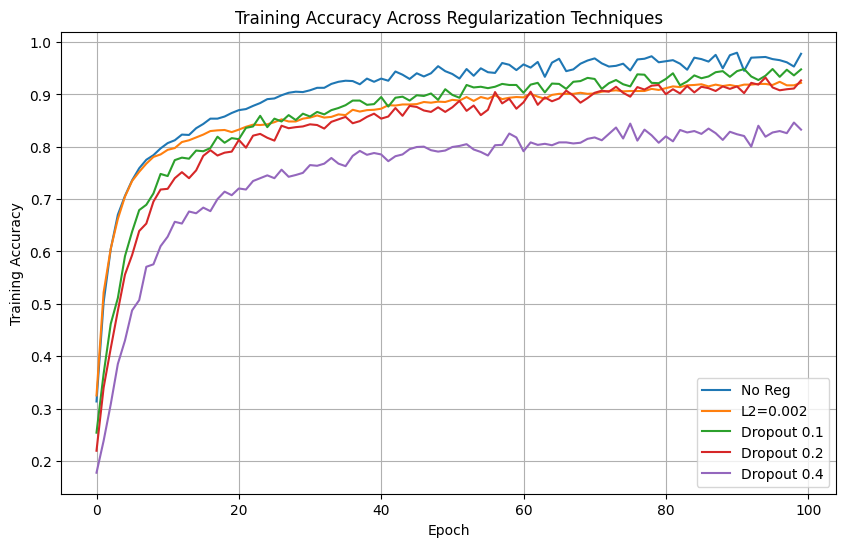

In [98]:
plt.figure(figsize=(10, 6))
for acc, lbl in zip(train_accs, labels):
    plt.plot(acc, label=lbl)
plt.title("Training Accuracy Across Regularization Techniques")
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.legend()
plt.grid(True)
plt.show()